In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import json
import os
import glob

In [2]:
# Path to the directory containing JSON results
folder_path = './results/'  # Replace with your folder path

# Using glob to find all json files in the directory
json_files = glob.glob(f"{folder_path}/*.json")

# List to hold the data
data = []

# Iterating through each file and extract the 3 columns we need
for file in json_files:
    with open(file, 'r') as f:
        json_data = json.load(f)
        # Extracting the required fields
        document_depth = json_data.get("depth_percent", None)
        context_length = json_data.get("context_length", None)
        score = json_data.get("score", None)
        # Appending to the list
        data.append({
            "Document Depth": document_depth,
            "Context Length": context_length,
            "Score": score
        })

# Creating a DataFrame
df = pd.DataFrame(data)

   Document Depth  Context Length  Score
0            35.0           16000     10
1            70.0          120000      7
2            55.0          128000     10
3            90.0          112000      3
4             5.0           80000     10
You have 336 rows


In [3]:
pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index() # This will aggregate
pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score") # This will turn into a proper pivot


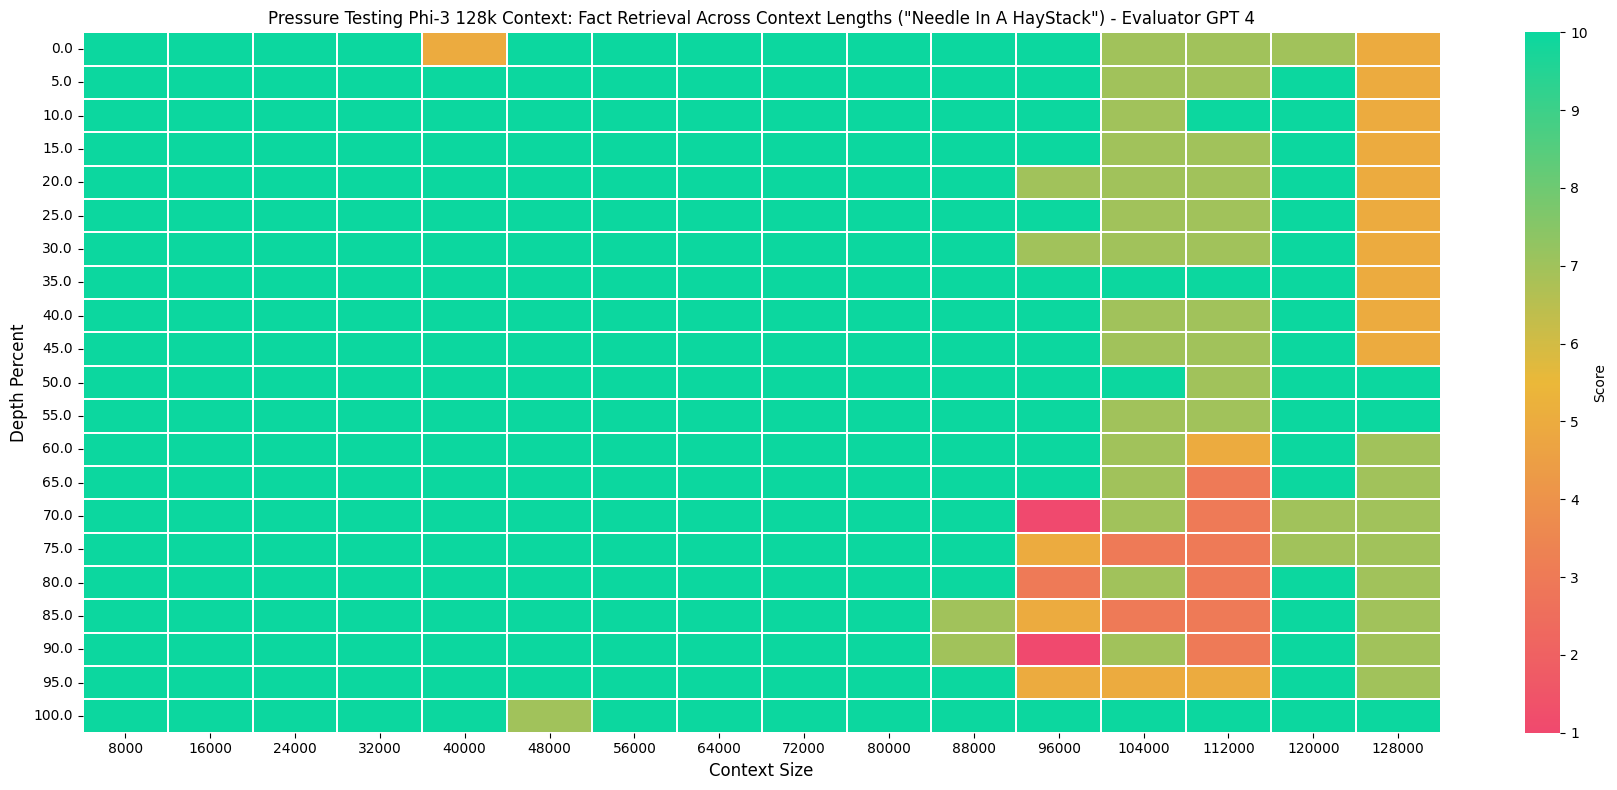

In [5]:


cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])


plt.figure(figsize=(18, 8))
sns.heatmap(
    pivot_table,
    annot=False,
    fmt="g",
    cmap=cmap,
    cbar_kws={'label': 'Score'},
    linewidths=.1,
    linecolor='white'
)

# Enhancing aesthetics and readability
plt.title('Pressure Testing Phi-3 128k Context: Fact Retrieval Across Context Lengths ("Needle In A HayStack") - Evaluator GPT 4', fontsize=12)
plt.xlabel('Context Size', fontsize=12)
plt.ylabel('Depth Percent', fontsize=12)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

plt.show()